# VIX as a measure of Market Uncertainty
---
by **Brandon Wang** (bw1115)

Data Bootcamp Final Project (NYU Stern Spring 2017)

## Abstract

The VIX index, calculated and published by the Chicago Board Options Exchange, is known to be a "fear gauge" of the stock market. Specifically designed to move in the opposite direction of the S&P, the volatility index seeks to somehow quantify the Street's anxiety and risk appetite. Also priced into the index are the expected price swings of the broader market, as the VIX's underlying are S&P options and futures. 

#### Objective

This project aims to examine the relationship between the VIX index and several other popular instruments or financial metrics. While the market can be entirely a random-walk, market participants still create narratives to explain movements and trends. For investors, the VIX is an important gauge of the possibility of these narratives. As such, the assumption is that the VIX is a robust indicator of market trends. 

### Data Sources

This analysis will draw on 2 financial data sources for numerous datasets.

* **Quandl**
 * CBOE Volatility Index (VIX)
 * S&P 500 Index 

* **Bloomberg Terminal**
 * S&P Foward Price-Earnings Ratio, 12 months trailing
 * Global Economic Policy Uncertainty Index 
 * Federal Funds Futures, short-term rates of 30-days 
 * Merrill Lynch Move Index, measuring bond volatility
 * JP Morgan Currency Volatility Index
 * S&P E-Mini Futures Bid-Ask Spread (ES1 Index)
 
Quandl is a financial data company that pools data from many sources into its API. There are also unconvential data sets for purchase, collected by independent companies involved in the market. Luckily, the Chicago Board Options Exchange uploads its data to Quandl for free. 

Elsewhere, the data is not-so-public, requiring access to Bloomberg's suite of data. While Bloomberg has its own API for programming languages like Python, the terminal and an account have to be tied to the computer used. Thus, I took the less fancy approach of extracting the data via Bloomberg's excel add-on and storing it locally. 

The Bloomberg excel spreadsheets are available [here.](https://drive.google.com/drive/folders/0Bw0drWWsoOJMelAtR09GNWlVY0U?usp=sharing)

These two sources have an underappreciated advantage: they are neat and tailored for data analysis, without too many unneccessary parameters. This removes the trouble of having to create a datetime index and format individual values. 

## The Current State of VIX 
---

In [681]:
# Setup
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import seaborn as sns                  # seaborn graphics module
import os                              # OS interface module

import quandl                          # financial data

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Seaborn version: ', sns.__version__)
print('quandl version: ', quandl.version.VERSION)
print('Today: ', dt.date.today())

# Time parameters used in analysis 
start = dt.datetime(2005, 1,1)
end= dt.datetime(2017,5,11)

Python version: 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.19.2
Seaborn version:  0.7.1
quandl version:  3.1.0
Today:  2017-05-12


In [683]:
quandl.ApiConfig.api_key = "7W3a2MNz8r4uQebgVb5g"

vix = quandl.get("CBOE/VIX",start_date="2005-01-01",end_date="2017-12-09")
vix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3111 entries, 2005-01-03 to 2017-05-11
Data columns (total 4 columns):
VIX Open     3111 non-null float64
VIX High     3111 non-null float64
VIX Low      3111 non-null float64
VIX Close    3111 non-null float64
dtypes: float64(4)
memory usage: 121.5 KB


In [684]:
# cleaning dataset

vix = vix.drop(['VIX Open', 'VIX High', 'VIX Low'], axis=1)
vix.columns = ['Close']
vix.head()

,Close
Date,
2005-01-03,14.08
2005-01-04,13.98
2005-01-05,14.09
2005-01-06,13.58
2005-01-07,13.49


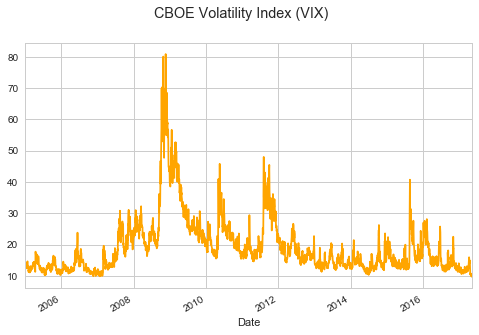

In [686]:
# plotting dataframe 

fig, ax = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')

vix['Close'].plot(color='orange')
fig.suptitle('CBOE Volatility Index (VIX)')
plt.show()

The index shows the relative calm that the stock market has enjoyed, especially in the first few months of 2017. Just recently, the index has hit its lowest closing level since December of 1993. However, long troughs in VIX with long periods of low volatility is troubling to some investors. [Blankfein, CEO of Goldman Sachs, has cautioned](http://www.cnbc.com/2017/05/09/goldman-sachs-ceo-lloyd-blankfein-says-the-markets-low-volatility-is-worrisome.html) against the current norm of calmness and the potential hubris of thinking everything is under control. 

While many investors use VIX as a metric in their bets, it is worth noting that depending on VIX as a measurement of "fear" can cause ripple effects if it is inaccurate. In the late 2006s and early 2007s, leading up to the large financial crisis, the VIX was also hovering at a low level, also reflecting a period of calm that we also have today.


## VIX Movement with S&P 500
---



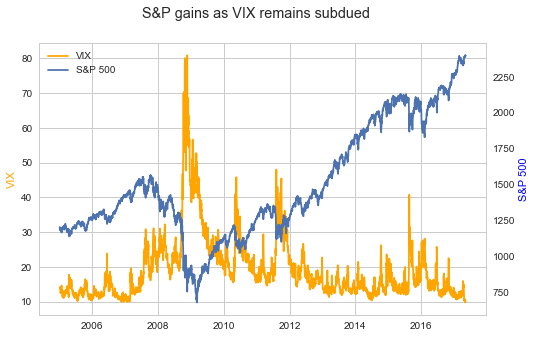

In [371]:
sp500 = quandl.get("YAHOO/INDEX_GSPC",start_date="2005-01-03",end_date="2017-05-11")
sp500 = sp500.drop(['Open','High','Low','Volume','Adjusted Close'], axis=1)

# creating fig and ax, plotting objects 
fig,ax1 = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')

ax2 = ax1.twinx()
a = ax1.plot(vix['Close'], color='orange', label='VIX')
b = ax2.plot(sp500['Close'], label='S&P 500')

# titling and formating
ax1.set_ylabel('VIX', color='orange')
ax2.set_ylabel('S&P 500', color='blue')
fig.suptitle('S&P gains as VIX remains subdued')
ax2.grid(False)

# adding lines on different axes into one legend 
line = a + b
label = [l.get_label() for l in line]
ax1.legend(line, label, loc='upper left')

plt.show()

#### S&P Valuations and VIX - a rare relationship

In [404]:
# changing directory to where .csv file is downloaded
os.chdir('C:/Users/Brandon/Downloads') 
sp_pe = pd.read_excel('SPX PE.xlsx')

# cleaning dataset
sp_pe.columns = sp_pe.iloc[0]
sp_pe = sp_pe.set_index(['Date'])
sp_pe = sp_pe[1:]
sp_pe = sp_pe.rename(columns={'PE_RATIO': 'S&P P/E'})


# merging vix dataset with S&P PE ratios 
vix_sppe = pd.merge(vix, sp_pe,
                    how='left',
                    right_index=True,
                    left_index=True,
                   )

# changing index for scatterplot
vix_sppe = vix_sppe.rename(columns={'Close': 'VIX'})
vix_sppe.index = range(len(vix_sppe))

# array of last 30 days
vix_sppe_30 = vix_sppe.iloc[-30:]
vix_sppe_30 = vix_sppe_30.values

vix_sppe.head()

,VIX,S&P P/E
0,14.08,18.3076
1,13.98,18.0942
2,14.09,18.0291
3,13.58,18.0987
4,13.49,18.0739


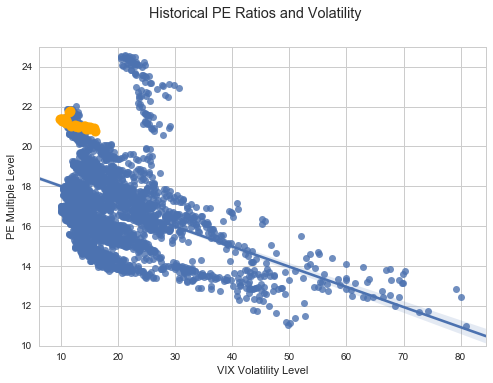

In [407]:
fig, ax = plt.subplots()
sns.set(style='whitegrid')

sns.regplot('VIX', 'S&P P/E', data=vix_sppe)

fig.suptitle('Historical PE Ratios and Volatility')
ax.set_xlabel('VIX Volatility Level')
ax.set_ylabel('PE Multiple Level')
ax.set_ylim([10, 25])   

for item in vix_sppe_30:
    item.flatten()
    ax.plot(item[0], item[1], 'o',
        color='orange', markersize=10)
    
plt.show()

With the absence of sharp-moves in the VIX, the S&P 500 index has reached record highs. However, it is difficult to ignore the rarity of how low the VIX is, while stocks enjoy lofty valuations. The orange circles represent the data points for the last 30 trading sessions, nearing the highest P/E multiples for the lowest instances of volatility.


Outliers include the batch of high PE multiples nearing 25, which occured at the height of real-estate bubble. Instances with incredibly high volatility represent days with large swings in prices.

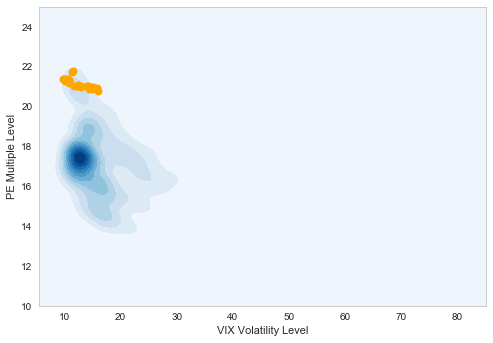

In [657]:
fig, ax = plt.subplots()

sns.kdeplot(vix_sppe, shade=True, cmap='Blues')

ax.set_xlabel('VIX Volatility Level')
ax.set_ylabel('PE Multiple Level')
ax.set_ylim([10, 25])

for item in vix_sppe_30:
    item.flatten()
    ax.plot(item[0], item[1], 'o',
        color='orange', markersize=8)

plt.show()

The density graph above better shows the rarity of the recent S&P valuations paried with the levels of VIX. More commonly, stocks are valued around the 17-18  mark, with a VIX level around the mid teens. 

Investors can interpret this in two ways: either the market is complacent towards high market valuations and a potential equity bubble, or the VIX is inaccurate in measuring investor uncertainty as the S&P crawls towards unexplained high stock valuations.

## VIX and the Macro Environment 
---

#### Global Political Uncertainty

In [633]:
gpu = pd.read_excel('EPUCGLCP.xlsx')

# cleaning dataset
gpu.columns = gpu.iloc[0]
gpu = gpu.set_index(['Date'])
gpu = gpu[1:]
gpu = gpu.rename(columns={'PX_LAST': 'GPU Index'})

# merging with vix
vix_gpu = pd.merge(vix, gpu,
                   how='left',
                   right_index=True,
                   left_index=True,
                  )
vix_gpu.head()

,VIX,GPU Index
Date,,
2005-01-03,14.08,NaN
2005-01-04,13.98,NaN
2005-01-05,14.09,NaN
2005-01-06,13.58,NaN
2005-01-07,13.49,NaN


In [634]:
# removing rows with NaN values 
vix_gpu = vix_gpu[pd.notnull(vix_gpu['GPU Index'])]

vix_gpu.head()

,VIX,GPU Index
Date,,
2005-01-31,12.82,57.44
2005-02-28,12.08,52.98
2005-03-31,14.02,54.52
2005-05-31,13.29,71.31
2005-06-30,12.04,69.64


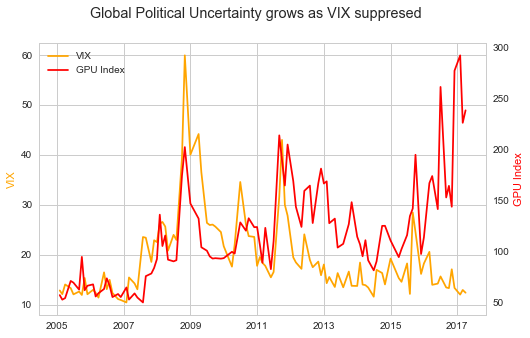

In [645]:
# creating fig and ax, plotting objects 
fig,ax1 = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')

ax2 = ax1.twinx()
a = ax1.plot(vix_gpu['VIX'], color='orange', label='VIX')
b = ax2.plot(vix_gpu['GPU Index'], color='red', label='GPU Index')

# titling and formating
ax1.set_ylabel('VIX', color='orange')
ax2.set_ylabel('GPU Index', color='red')
fig.suptitle('Global Political Uncertainty grows as VIX suppresed')
ax2.grid(False)

# adding lines on different axes into one legend 
line = a + b
label = [l.get_label() for l in line]
ax1.legend(line, label, loc='upper left')

plt.show()

The index for global political uncertainty has, to some degree, tracked the VIX and its yearly trends. However, starting from 2016, we observe a divergence, perhaps showing a decline in the VIX's ability to gauge political uncertainty.

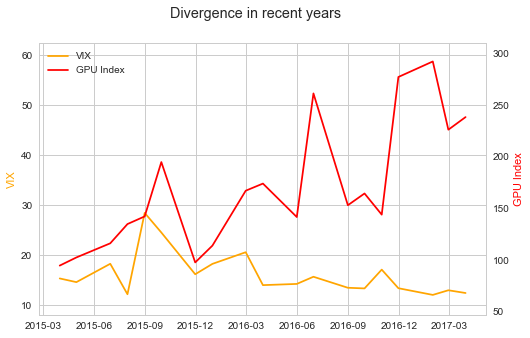

In [656]:
# narrowing the data to this year 
today = dt.date.today()
vix_gpu2015 = vix_gpu.loc['2015-01-01':today, 
                         ['VIX', 'GPU Index',]
                         ]

# creating fig and ax, plotting objects 
fig,ax1 = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')

ax2 = ax1.twinx()
a = ax1.plot(vix_gpu2015['VIX'], color='orange', label='VIX')
b = ax2.plot(vix_gpu2015['GPU Index'], color='red', label='GPU Index')

# titling and formating
ax1.set_ylabel('VIX', color='orange')
ax2.set_ylabel('GPU Index', color='red')
ax1.set_ylim([8,62.5])                         #match limits in previous graph
ax2.set_ylim([47,310])
fig.suptitle('Divergence in recent years')
ax2.grid(False)

# adding lines on different axes into one legend 
line = a + b
label = [l.get_label() for l in line]
ax1.legend(line, label, loc='upper left')

plt.show()

As orthodoxy and populism extend from our own White House to politics across the world, the VIX remains suprisingly low for something representing uncertainty. President Trump's election has spurred a rally in financials, industrials, and the broader market, but struggles to codify his agenda in healthcare and tax reform. As investors pull back from their high expectations, VIX should have taken off. Despite the very volatility of the President himself, the VIX remains at its lowests. 

Many investors explain away this divergence by citing strong U.S. corporate earnings, low unemployment, and rising inflation. Key macro indicators that are showing strength are essentially pushing away any concern for the policies of the current administration, or elsewhere in the world. 

#### The Federal Reserve's suppression of VIX

In [660]:
ffr = pd.read_excel('Short-Term Fed Funds Rate (30 Day).xlsx')

# cleaning dataset
ffr.columns = ffr.iloc[0]
ffr = ffr.set_index(['Date'])
ffr = ffr[1:]
ffr = ffr.rename(columns={'PX_LAST': 'Fed Funds Rate'})

# merging with vix
vix_ffr = pd.merge(vix, ffr,
                   how='left',
                   right_index=True,
                   left_index=True,
                  )
vix_ffr.head()

,VIX,Fed Funds Rate
Date,,
2005-01-03,14.08,NaN
2005-01-04,13.98,NaN
2005-01-05,14.09,NaN
2005-01-06,13.58,NaN
2005-01-07,13.49,NaN


In [663]:
# removing rows with NaN values 
vix_ffr = vix_ffr[pd.notnull(vix_ffr['Fed Funds Rate'])]

vix_ffr.head()

,VIX,Fed Funds Rate
Date,,
2014-04-30,13.41,97.84
2014-05-01,13.25,97.875
2014-05-02,12.91,97.835
2014-05-05,13.29,97.835
2014-05-06,13.80,97.835


In [690]:
# building out the implied Federal Funds Rate from the index's data
vix_ffr['Fed Funds Rate'] = 100 - vix_ffr['Fed Funds Rate']

vix_ffr.head()

,VIX,Fed Funds Rate
Date,,
2014-04-30,13.41,2.16
2014-05-01,13.25,2.125
2014-05-02,12.91,2.165
2014-05-05,13.29,2.165
2014-05-06,13.80,2.165


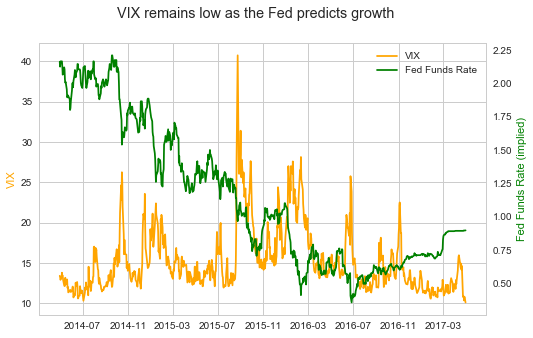

In [691]:
# creating fig and ax, plotting objects 
fig,ax1 = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')

ax2 = ax1.twinx()
a = ax1.plot(vix_ffr['VIX'], color='orange', label='VIX')
b = ax2.plot(vix_ffr['Fed Funds Rate'], color='green', 
             label='Fed Funds Rate')

# titling and formating
ax1.set_ylabel('VIX', color='orange')
ax2.set_ylabel('Fed Funds Rate (implied)', color='green')
fig.suptitle('VIX remains low as the Fed predicts growth')
ax2.grid(False)

# adding lines on different axes into one legend 
line = a + b
label = [l.get_label() for l in line]
ax1.legend(line, label, loc='upper right')

plt.show()

Investors commonly use implied volatility as shown in the VIX to measure uncertainty about interest rates, and specifically in this case, the implied federal funds target rate. Typically, when the implied federal funds target rate is rising, signaling strong inflation and growth, the VIX remains at its lows.

In monetary policy, the Fed has, since 2008, kept rates low to encourage investment. However, its recent support of higher benchmark rates has increased the implied fed fund rate, as many Fed officials believe the U.S. economy is on a growth path despite signs of weakness in consumer spending and wage growth. That message has had the effect of subduing levels of uncertainty in VIX, towards the latter half of 2016 to today. 

## VIX beyond Equities
---

In [479]:
bondvol = pd.read_excel('MOVE Index.xlsx')
currvol = pd.read_excel('TYVIX Index.xlsx')

# cleaning dataset
bondvol.columns = bondvol.iloc[0]
bondvol = bondvol.set_index(['Date'])
bondvol = bondvol[1:]
bondvol = bondvol.rename(columns={'PX_LAST': 'Treasury Vol Index'})

currvol.columns = currvol.iloc[0]
currvol = currvol.set_index(['Date'])
currvol = currvol[1:]
currvol = currvol.rename(columns={'PX_LAST': 'Currency Vol Index'})

# merging with vix (equity vol)
vix = vix.rename(columns={'Close': 'VIX'})
marketvol = pd.merge(vix, currvol,
                     how='left',
                     right_index=True,
                     left_index=True,
                    )
marketvol = pd.merge(marketvol, bondvol,
                     how='left',
                     right_index=True,
                     left_index=True,
                    )

marketvol.head()

,VIX,Currency Vol Index,Treasury Vol Index
Date,,,
2005-01-03,14.08,10.01,83.9
2005-01-04,13.98,10.21,83.3
2005-01-05,14.09,9.89,93.2
2005-01-06,13.58,9.98,92.4
2005-01-07,13.49,9.03,92.38


In [480]:
# narrowing the data to this year 
today = dt.date.today()
marketvol = marketvol.loc['2017-01-01':today, 
                         ['VIX', 'Currency Vol Index',
                          'Treasury Vol Index']
                         ]
marketvol.head()

,VIX,Currency Vol Index,Treasury Vol Index
Date,,,
2017-01-03,12.85,9.68,76.7316
2017-01-04,11.85,9.65,76.4077
2017-01-05,11.67,10.18,76.5029
2017-01-06,11.32,9.38,75.2375
2017-01-09,11.56,9.61,74.8288


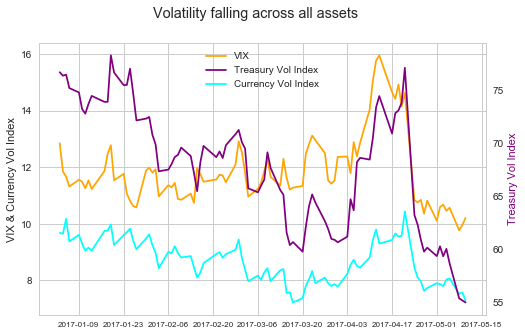

In [510]:
# creating fig and ax, plotting objects 
fig,ax1 = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')

ax2 = ax1.twinx()
a = ax1.plot(marketvol['VIX'], color='orange', label='VIX')
b = ax2.plot(marketvol['Treasury Vol Index'], 
             color='purple',
             label='Treasury Vol Index')
c = ax1.plot(marketvol['Currency Vol Index'],
             color='cyan',
             label='Currency Vol Index')

# titling and formating
ax1.set_ylabel('VIX & Currency Vol Index')
ax2.set_ylabel('Treasury Vol Index', color='purple')
fig.suptitle('Volatility falling across all assets')
ax2.grid(False)
ax1.tick_params(axis='x', labelsize=8)

# adding lines on different axes into one legend 
line = a + b + c
label = [l.get_label() for l in line]
ax1.legend(line, label, loc='upper center')

plt.show()

What is concerning is the inconsistency between the uncertainty we observe on social media or news sites and the low levels of uncertainty in recent months, expressed by the volatility indexes above. The Fed even took this into consideration in their [meeting from April](https://www.bloomberg.com/news/articles/2017-02-22/now-even-the-fed-s-worried-that-stock-volatility-is-too-low), expressing their confusion as to why implied volatility has reached decade-long lows, despite the inaction we see from policy makers on key legislation such as Trump's tax reform and infrastructure program.

## VIX Reliability Concerns
---

Investors commonly debate over whether VIX is a proper metric for volatility. In this section, we'll examine one of the main concerns about VIX's reliability: the erosion of demand for S&P 500 options as an insurance against instability. 

In [604]:
sp_fut = pd.read_excel('S&P E-Mini Futures.xlsx')

# cleaning dataset
sp_fut.columns = sp_fut.iloc[0]
sp_fut = sp_fut.set_index(['Date'])
sp_fut = sp_fut[1:]
sp_fut = sp_fut.rename(columns={'PX_BID': 'E-Mini Bid',
                                'PX_ASK': 'E-Mini Ask'})
# new column - bid-ask spread 
title = 'S&P500 E-Mini Fut Bid-Ask Spread'
sp_fut[title] = sp_fut['E-Mini Ask'] - sp_fut['E-Mini Bid']

sp_fut.head()

,E-Mini Bid,E-Mini Ask,S&P500 E-Mini Fut Bid-Ask Spread
Date,,,
2005-01-03 00:00:00,1206.25,1206.5,0.25
2005-01-04 00:00:00,1190.75,1191,0.25
2005-01-05 00:00:00,1182.5,NaN,NaN
2005-01-06 00:00:00,1188,1188.25,0.25
2005-01-07 00:00:00,1185.5,NaN,NaN


In [676]:
# resampling by month and taking the average 
sp_fut.index = pd.to_datetime(sp_fut.index)
sp_fut_resample = sp_fut.resample('MS').sum()
sp_fut_count = sp_fut.resample('MS').count()
sp_fut_resample[title] = sp_fut_resample[title] / sp_fut_count[title]  # mean

# narrowing the data to this year 
today = dt.date.today()
vix2 = vix.loc['2007-01-01':today, ['VIX']]
sp_fut_resample = sp_fut_resample.loc['2007-01-01':today, [title]]

sp_fut_resample.head()

,S&P500 E-Mini Fut Bid-Ask Spread
Date,
2007-01-01,0.559524
2007-02-01,0.394737
2007-03-01,1.261905
2007-04-01,0.440476
2007-05-01,0.375000


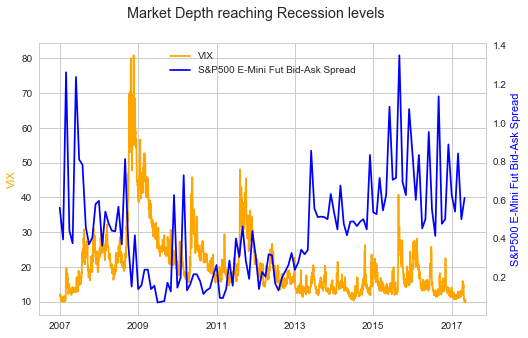

In [678]:
# creating fig and ax, plotting objects 
fig,ax1 = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')

ax2 = ax1.twinx()
a = ax1.plot(vix2['VIX'], color='orange', label='VIX')
b = ax2.plot(sp_fut_resample[title], 
             color='blue',
             label=title)

# titling and formating
ax1.set_ylabel('VIX', color='orange')
ax2.set_ylabel(title, color='blue')
fig.suptitle('Market Depth reaching Recession levels')
ax2.grid(False)

# adding lines on different axes into one legend 
line = a + b
label = [l.get_label() for l in line]
ax1.legend(line, label, loc='upper center')

plt.show()

The widening spreads of the S&P 500 derivatives alludes to less of a demand, and subsequently less volumne traded, for those products. Here lies a flaw in the VIX: it becomes less valuable as a metric if the underlying is traded less. 

## Conclusion
---

The visualization of VIX compared to other financial instruments and metrics creates a mixed-bag of results. On one hand, we see equity volatility as measured by VIX as having the same movements as other asset classes, namely Treasuries and FX, matching the realized low volatility world. Fed Fund Future are also telling of improving macro trends, matching the lack of uncertainty shown in the VIX. In the other, VIX is less an indicator of market sentiment, remaining subdued while P/E ratios and global political uncertainty are at their highests.

All this points to VIX not as the be-all and end-all of fear indexes, but one of many factors, with its own flaws, that should be taken into account alongside P/E ratios, corporate earnings, political uncertainty, dollar strength, junk-bond yields, hedge instruments, etc., in accurately checking the temperature of the markets. 